In [3]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass

/home/amit/AmitKushwaha/Courses/Books


In [4]:
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import statsmodels.formula.api as smf

### Generating data (strong correlation between predictors)

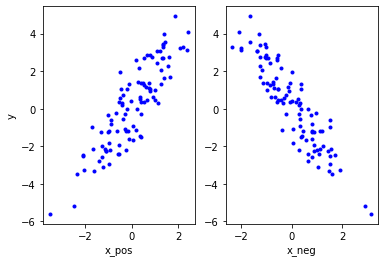

In [5]:
N = 100
rho = -0.9
x_pos = np.random.normal(size=N)
x_neg = np.random.normal(loc=rho * x_pos, scale=np.sqrt(1 - rho**2), size=N)
y = np.random.normal(size=N, loc=x_pos - x_neg)

fig, ax = plt.subplots(ncols=2)
ax[0].plot(x_pos, y, 'b.')
ax[1].plot(x_neg, y, 'b.')
ax[0].set_xlabel('x_pos')
ax[1].set_xlabel('x_neg')
ax[0].set_ylabel('y')
plt.show()


In [6]:
# Model with single predictor 1
with pm.Model() as model_bl:
    a = pm.Normal('a', mu=10, sigma=100)
    bl = pm.Normal('bl', mu=2, sigma=10)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    mu = pm.Deterministic('mu', a + bl * x_pos)
    h = pm.Normal('h', mu=mu, sigma=sigma, observed=y)
    trace_bl = pm.sample(cores=2)

# Model with single predictor 2
with pm.Model() as model_br:
    a = pm.Normal('a', mu=10, sigma=100)
    br = pm.Normal('br', mu=2, sigma=10)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    mu = pm.Deterministic('mu', a + br * x_neg)
    h = pm.Normal('h', mu=mu, sigma=sigma, observed=y)
    trace_br = pm.sample(cores=2)

# Model with both predictors
with pm.Model() as model_collinear:
    a = pm.Normal('a', mu=10, sigma=100)
    bl = pm.Normal('bl', mu=2, sigma=10)
    br = pm.Normal('br', mu=2, sigma=10)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    mu = pm.Deterministic('mu', a + bl * x_pos + br * x_neg)
    h = pm.Normal('h', mu=mu, sigma=sigma, observed=y)
    trace_collinear = pm.sample(cores=2)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bl, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1419.29draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, br, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1647.49draws/s]
The acceptance probability does not match the target. It is 0.8806174936851959, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, br, bl, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:02<00:00, 963.93draws/s]
The acceptance probability does not match the target. It is 0.8834351810393708, but should be close to 0.8. Try to increase the number of tuning steps.


(<Figure size 432x705.6 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f06f73810>],
       dtype=object))

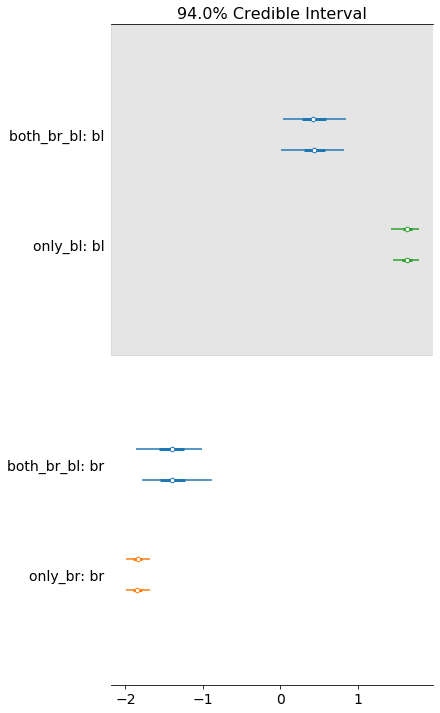

In [7]:
# Plots
az.plot_forest([trace_collinear, trace_br, trace_bl],
               model_names=['both_br_bl', 'only_br', 'only_bl'],
               var_names=['bl', 'br'])

### Generating data (weak correlation between predictors)






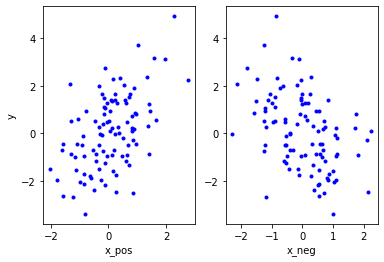

In [8]:
N = 100
rho = -0.1
x_pos = np.random.normal(size=N)
x_neg = np.random.normal(loc=rho * x_pos, scale=np.sqrt(1 - rho**2), size=N)
y = np.random.normal(size=N, loc=x_pos - x_neg)

fig, ax = plt.subplots(ncols=2)
ax[0].plot(x_pos, y, 'b.')
ax[1].plot(x_neg, y, 'b.')
ax[0].set_xlabel('x_pos')
ax[1].set_xlabel('x_neg')
ax[0].set_ylabel('y')
plt.show()


In [9]:
# Model with single predictor 1
with pm.Model() as model_bl:
    a = pm.Normal('a', mu=10, sigma=100)
    bl = pm.Normal('bl', mu=2, sigma=10)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    mu = pm.Deterministic('mu', a + bl * x_pos)
    h = pm.Normal('h', mu=mu, sigma=sigma, observed=y)
    trace_bl = pm.sample(cores=2)

# Model with single predictor 2
with pm.Model() as model_br:
    a = pm.Normal('a', mu=10, sigma=100)
    br = pm.Normal('br', mu=2, sigma=10)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    mu = pm.Deterministic('mu', a + br * x_neg)
    h = pm.Normal('h', mu=mu, sigma=sigma, observed=y)
    trace_br = pm.sample(cores=2)

# Model with both predictors
with pm.Model() as model_collinear:
    a = pm.Normal('a', mu=10, sigma=100)
    bl = pm.Normal('bl', mu=2, sigma=10)
    br = pm.Normal('br', mu=2, sigma=10)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    mu = pm.Deterministic('mu', a + bl * x_pos + br * x_neg)
    h = pm.Normal('h', mu=mu, sigma=sigma, observed=y)
    trace_collinear = pm.sample(cores=2)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bl, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1363.56draws/s]
The acceptance probability does not match the target. It is 0.881053612679417, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8816221888627174, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, br, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1462.77draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, br, bl, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:02<00:00, 961.83draws/s]


(<Figure size 432x705.6 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f585cb450>],
       dtype=object))

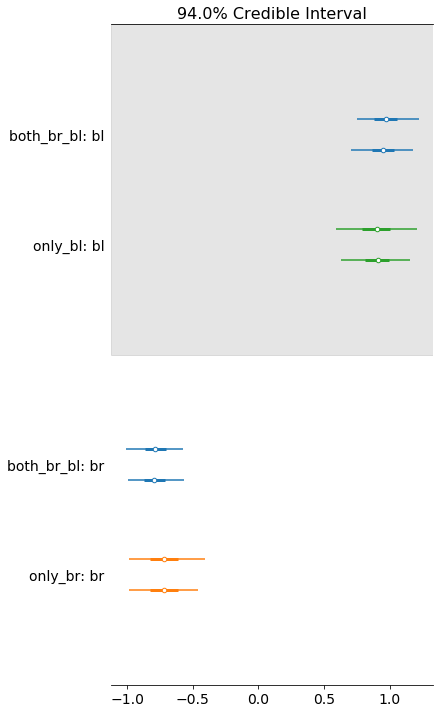

In [10]:
# Plots
az.plot_forest([trace_collinear, trace_br, trace_bl],
               model_names=['both_br_bl', 'only_br', 'only_bl'],
               var_names=['bl', 'br'])

### Conclusions:
Strong correlation: masking phenomenon observed </br>
Weak correlation: masking phenomenon diminishes